# Part 4: Exploratory Data Analysis & Data Visualization

## Introduction to Python

### Tom Paskhalis

##### 2022-07-27

##### Data Science Summer School 2022

## Exploratory data analysis

> *Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone - as the first step.*    
>    
> [Tukey, 1977](https://archive.org/details/exploratorydataa0000tuke_7616)

- Exploratory data analysis (EDA) is the first and often most important step in research
- Study's feasibility, scope and framing would usually depend on its results
- Specific details of EDA depend upon the type and quality of data available

## Measurement scales

<div style="text-align: center;">
    <img width="700" height="400" src="imgs/Stevens1946_tab1.png">
</div>

Source: [Stevens (1946)](https://doi.org/10.1126/science.103.2684.677)

## Measurement scales in Pandas

- The 4 measurement scales defined by Stevens (1946) can be roughly represented in pandas as follows:
- *Interval* and *ratio* -> numeric
- *Nominal* and *ordinal* -> [categorical](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

## Loading the dataset

In [1]:
import pandas as pd

In [2]:
united_2022 = pd.read_csv('../data/united_2022.csv')

In [3]:
united_2022.head(n = 1)

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,UA,01/01/2022,225,N488UA,ATL,DEN,16:15:00,17:23:00,211,240,68,17:35:00,12,0,0,29,0,68


## Summarizing numeric variables

- DataFrame methods in pandas can automatically handle (exclude) missing data (`NaN`)

In [4]:
united_2022.describe() # DataFrame.describe() provides an range of summary statistics

,Flight Number,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
count,154575.000000,154575.000000,154575.000000,154575.000000,154575.000000,154575.000000,154575.000000,154575.000000,154575.000000,154575.000000
mean,1442.155795,192.808876,180.380618,14.024842,18.978451,5.010209,0.552172,2.590923,0.001844,5.616122
std,732.636240,86.048770,88.502329,46.833963,10.081536,25.454662,12.039743,13.370774,0.281220,28.164622
min,42.000000,42.000000,0.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,691.000000,134.000000,123.000000,-4.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1546.000000,173.000000,164.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2060.000000,239.000000,230.000000,12.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3010.000000,685.000000,711.000000,1403.000000,184.000000,1215.000000,876.000000,999.000000,70.000000,1280.000000


## Methods for summarizing numeric variables

In [5]:
# Rather than using describe(), we can apply individual methods
united_2022['Departure delay (Minutes)'].mean()

14.024842309558467

In [6]:
united_2022['Departure delay (Minutes)'].median() # Median

0.0

In [7]:
united_2022['Departure delay (Minutes)'].std() # Standard deviation

46.833962555880554

In [8]:
import statistics ## We don't have to rely only on methods provided by `pandas`
statistics.stdev(united_2022.iloc[:,10])

46.833962555880554

## Summarizing categorical variables

In [9]:
united_2022.describe(include = 'all') # Adding include = 'all' tells pandas to summarize all variables

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
count,154575,154575,154575.000000,151157,154575,154575,154575,154575,154575.000000,154575.000000,154575.000000,154575,154575.000000,154575.000000,154575.000000,154575.000000,154575.000000,154575.000000
unique,1,151,NaN,747,12,110,1066,1307,NaN,NaN,NaN,1305,NaN,NaN,NaN,NaN,NaN,NaN
top,UA,05/26/2022,NaN,N32404,DEN,EWR,06:00:00,00:00:00,NaN,NaN,NaN,00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,154575,1143,NaN,337,32245,9800,1686,3418,NaN,NaN,NaN,3473,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1442.155795,NaN,NaN,NaN,NaN,NaN,192.808876,180.380618,14.024842,NaN,18.978451,5.010209,0.552172,2.590923,0.001844,5.616122
std,NaN,NaN,732.636240,NaN,NaN,NaN,NaN,NaN,86.048770,88.502329,46.833963,NaN,10.081536,25.454662,12.039743,13.370774,0.281220,28.164622
min,NaN,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,42.000000,0.000000,-29.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,691.000000,NaN,NaN,NaN,NaN,NaN,134.000000,123.000000,-4.000000,NaN,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,1546.000000,NaN,NaN,NaN,NaN,NaN,173.000000,164.000000,0.000000,NaN,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,2060.000000,NaN,NaN,NaN,NaN,NaN,239.000000,230.000000,12.000000,NaN,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Methods for summarizing categorical variables

In [10]:
united_2022['Flight Number'].mode() # Mode, most frequent value

0    1561
Name: Flight Number, dtype: int64

In [11]:
united_2022['Origin Airport'].value_counts() # Counts of unique values

DEN    32245
EWR    25761
ORD    24767
IAH    22561
SFO    16511
IAD    11286
LAX     9986
MCO     5680
DFW     2658
ATL     1297
PHL     1221
JFK      602
Name: Origin Airport, dtype: int64

In [12]:
united_2022['Origin Airport'].value_counts(normalize = True) # We can further normalize them by the number of rows

DEN    0.208604
EWR    0.166657
ORD    0.160226
IAH    0.145955
SFO    0.106815
IAD    0.073013
LAX    0.064603
MCO    0.036746
DFW    0.017196
ATL    0.008391
PHL    0.007899
JFK    0.003895
Name: Origin Airport, dtype: float64

## Summary of descriptive statistics methods

| Method         | Numeric   | Categorical   | Description                                    |
|:---------------|:----------|:--------------|:-----------------------------------------------|
| `count`        | yes       | yes           | Number of non-NA observations                  |
| `value_counts` | yes       | yes           | Number of unique observations by value         |
| `describe`     | yes       | yes           | Set of summary statistics for Series/DataFrame |
| `min`, `max`   | yes       | yes (caution) | Minimum and maximum values                     |
| `quantile`     | yes       | no            | Sample quantile ranging from 0 to 1            |
| `sum`          | yes       | yes (caution) | Sum of values                                  |
| `prod`         | yes       | no            | Product of values                              |
| `mean`         | yes       | no            | Mean                                           |
| `median`       | yes       | no            | Median (50% quantile)                          |
| `var`          | yes       | no            | Sample variance                                |
| `std`          | yes       | no            | Sample standard deviation                      |
| `skew`         | yes       | no            | Sample skewness (third moment)                 |
| `kurt`         | yes       | no            | Sample kurtosis (fourth moment)                |

## Crosstabulation

- When working with survey data it is often useful to perform simple crosstabulations
- Crosstabulation (or *crosstab* for short) is a computation of group frequencies
- It is usually used for working with categorical variables that have a limited number of categories
- In pandas `pd.crosstab()` method is a special case of `pd.pivot_table()`

## Crosstabulation in pandas

In [13]:
# Calculate crosstabulation between origin and destination airports
pd.crosstab(united_2022['Origin Airport'], united_2022['Destination Airport'])

Destination Airport,ABQ,ALB,ANC,ATL,AUS,BDL,BIL,BNA,BOI,BOS,...,SLC,SMF,SNA,SRQ,STL,STT,SYR,TPA,TUL,TUS
Origin Airport,,,,,,,,,,,,,,,,,,,,,
ATL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DEN,267,0,154,313,585,151,300,151,300,670,...,422,633,617,151,257,0,110,565,108,232
DFW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EWR,0,0,0,586,553,0,0,346,0,1280,...,221,150,375,290,0,153,1,1157,0,0
IAD,0,0,0,147,270,340,0,162,0,480,...,0,88,0,2,0,151,123,400,0,0
IAH,68,0,0,23,897,86,0,112,0,464,...,139,175,537,0,96,130,0,637,118,36
JFK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LAX,0,0,0,0,111,0,0,0,0,250,...,0,0,0,0,0,0,0,142,0,0
MCO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Margins in crosstab

In [14]:
# It is often useful to see the proportions/percentages rather than raw counts
pd.crosstab(united_2022['Origin Airport'], united_2022['Destination Airport'], normalize = 'columns')

Destination Airport,ABQ,ALB,ANC,ATL,AUS,BDL,BIL,BNA,BOI,BOS,...,SLC,SMF,SNA,SRQ,STL,STT,SYR,TPA,TUL,TUS
Origin Airport,,,,,,,,,,,,,,,,,,,,,
ATL,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DEN,0.600000,0.0,0.7,0.240769,0.174367,0.169473,1.0,0.142185,1.0,0.159069,...,0.444211,0.477376,0.245426,0.226387,0.728045,0.000000,0.321637,0.151678,0.477876,0.682353
DFW,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EWR,0.000000,0.0,0.0,0.450769,0.164829,0.000000,0.0,0.325800,0.0,0.303894,...,0.232632,0.113122,0.149165,0.434783,0.000000,0.322785,0.002924,0.310604,0.000000,0.000000
IAD,0.000000,0.0,0.0,0.113077,0.080477,0.381594,0.0,0.152542,0.0,0.113960,...,0.000000,0.066365,0.000000,0.002999,0.000000,0.318565,0.359649,0.107383,0.000000,0.000000
IAH,0.152809,0.0,0.0,0.017692,0.267362,0.096521,0.0,0.105461,0.0,0.110161,...,0.146316,0.131976,0.213604,0.000000,0.271955,0.274262,0.000000,0.171007,0.522124,0.105882
JFK,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LAX,0.000000,0.0,0.0,0.000000,0.033085,0.000000,0.0,0.000000,0.0,0.059354,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038121,0.000000,0.000000
MCO,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Data visualization

<div style="text-align: center;">
    <img width="700" height="400" src="imgs/Tufte2001_napoleon.png">
</div>

Source: [Tufte (2001)](https://www.edwardtufte.com/tufte/books_vdqi), based on Marey (1885)

## Data visualization in Python

- As with dealing with data, Python has no in-built, 'base' plotting functionality
- `matplotlib` has become the one of standard solutions
- It is often used [in combination with `pandas`](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
- Other popular alternative include `seaborn` and `plotnine`
- Also `pandas` itself has some limited plotting facilities

## `plotnine` - `ggplot` for Python

- `plotnine` implements Grammar of Graphics data visualisation scheme [(Wilkinson, 2005)](https://doi.org/10.1007/0-387-28695-0)
- It mimics the syntax of a well-known R library `ggplot2`syntax [(Wickham, 2010)](https://doi.org/10.1198/jcgs.2009.07098)
- In doing so, it makes the code (almost) seamlessly portable between the two languages

## Grammar of graphics

- Grammar of Graphics is a powerful conceptualization of plotting
- Graphs are broken into multiple layers
- Layers can be recycled across multiple plots

## Structure of ggplot calls in `plotnine`

- Creation of ggplot objects in `plotline` has the following structure:

```
ggplot(data = <DATA>) +\
    <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
```

- If the *mappings* are re-used across geometric objects (e.g. scatterplot and line):

```
ggplot(data = <DATA>, mapping = aes(<MAPPINGS>)) +\
    <GEOM_FUNCTION>() +\
    <GEOM_FUNCTION>()
```

## Creating a ggplot in `plotnine`

In [15]:
from plotnine import *

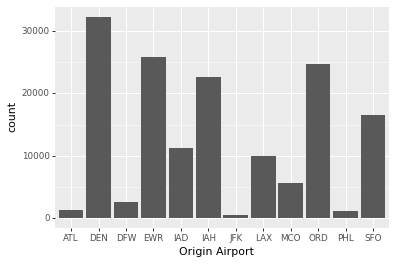

<ggplot: (8785261968216)>

In [16]:
origin_plot = ggplot(data = united_2022) + geom_bar(aes(x = 'Origin Airport'))
origin_plot

## Compare to base `pandas`

In [17]:
# First we need to group dataset by 'Origin Airport' and summarize it with `size()`
united_2022_origin_grouped = united_2022.groupby(['Origin Airport']).size() 

<AxesSubplot:xlabel='Origin Airport'>

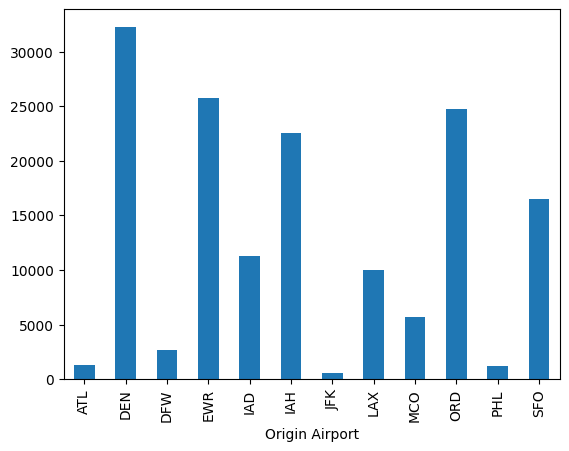

In [18]:
united_2022_origin_grouped.plot(kind = 'bar')

## Compare to `matplotlib`

In [19]:
import matplotlib.pyplot as plt

<BarContainer object of 12 artists>

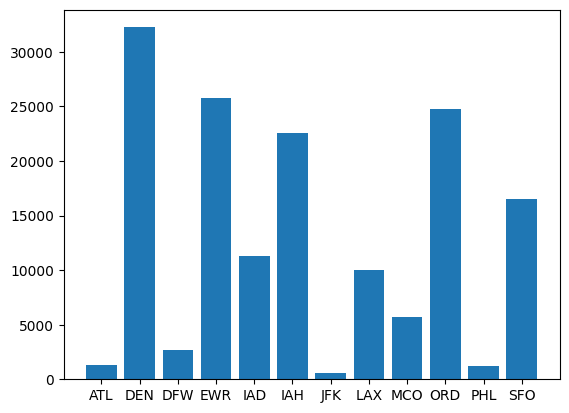

In [20]:
# `matplotlib` is more low-level library
# plots would need more work to be 'prettified'
plt.bar(x = united_2022_origin_grouped.index, height = united_2022_origin_grouped.values)

## Prettifying ggplot in `plotnine`

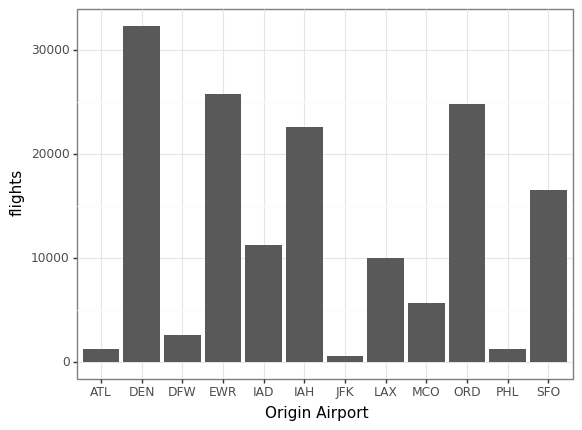

<ggplot: (8785259675203)>

In [21]:
# Here we change default axes' labels and then apply B&W theme
origin_plot_pretty = origin_plot +\
    labs(y = 'flights') +\
    theme_bw()
origin_plot_pretty

## Other geometric objects (`geom_`)

| Method                       | Description                |
|:-----------------------------|:---------------------------|
| `geom_bar()`, `geom_col()`   | Bar charts                 |
| `geom_boxplot()`             | Box and whisker plot       |
| `geom_histogram()`           | Histogram                  |
| `geom_point()`               | Scatterplot                |
| `geom_line()`, `geom_path()` | Lines                      |
| `geom_map()`                 | Geographic areas           |
| `geom_smooth()`              | Smoothed conditional means |
| `geom_violin()`              | Violin plots               |


## Writing plots out in `plotnine`

- Output format is automatically determined from write-out file extension
- Commonly used formats are PDF, PNG and EPS

In [22]:
origin_plot_pretty.save('../temp/q1_plot_pretty.pdf')

/home/tpaskhalis/Decrypted/Git/DS3/venv/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/tpaskhalis/Decrypted/Git/DS3/venv/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../temp/q1_plot_pretty.pdf


## Additional visualization materials

Books:

- Hieran, Kiely. 2019. *Data Visualization: A Practical Introduction*. Princeton, NJ: Princeton University Press
- Tufte, Edward. 2001. *The Visual Display of Quantitative Information*. 2nd ed. Cheshire, CT: Graphics Press

Online:

- [Plotnine: Grammar of Graphics for Python](https://datascienceworkshops.com/blog/plotnine-grammar-of-graphics-for-python/)
- [Plotnine Documentation](https://plotnine.readthedocs.io/en/stable/index.html)
- [ggplot2 Documentation](https://ggplot2.tidyverse.org/)

## The end

<div style="text-align: center;">
    <img width="500" height="300" src="imgs/butterfly_meme.jpg">
</div>